# 1. Business Understanding 

### Business Problem

For online retailer companies, 'delivery performance' is one of the key factor to improve business and market share. Secondly, workload of delivery boys is an important factor that affects 'delivery performance'. Optimizing factors affecting the workload and in turn optimizing 'absenteeism' of delivery boys is the business problem that we are trying to solve.

### Data Required

We need Time-Series data that provides delivery information of online retailer consisting of features - 'hours of absence', day and month information, demographics information like - age, distance of residence from work etc, other features of employees that can likely influence absence like body mass index, weight, smoker/non-smoker etc.

### Sources of data

We will look in public data sources like 'Kaggle'or 'CI Machine Learning Repository'. It is highly likely we would get the required data from these sources.

### Analytics tasks

We are going to explore and visualize the data to coduct analysis. We will carry out pre-processing as per need as an input to sutiable machine learning model for predicting asbenteeism for delivery boys. Finally, we will evaluate the model and then recommend to business for using it to optimize delivery performance.  



# 2. Data Acquisition

We have identified the dataset https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work that is available at UCI Machine Learning Repository. After inspecting the dataset we find it appropriate for our business case.


## 2.1 Download the data directly



In [1]:
# Dataset is downloaded from public repository and kept in github for access

import pandas as pd
url = "https://raw.githubusercontent.com/AsimKarel/datasets/main/Absenteeism_at_work.csv"


## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
# Read dataset and create the dataframe. Dataset is csv seperated by ;

df = pd.read_csv(url, sep=";" )


## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
# Display first five records to check they are displayed correctly

df.head(5)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
# Display last five records to check they are displayed correctly

df.tail(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


Observation : Data is displayed looks correct.

## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
# Display column headings

df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
# Display statistical information and summary

df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
#Display Datatype Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [8]:
# Display size of the dataset
df.shape

(740, 21)

In [9]:
# Check for null values
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## 2.5 Observations from the above


### Size of Dataset

Dataset have 740 rows (samples) and 21 columns (features)

### Data attribute types

All attributes (except 'Work load Average/day') is integer. 'Work load Average/day' is of type float.

### Null Data

There are no null values in the dataset.



# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [10]:
# Check for duplicate data
len(df)-len(df.drop_duplicates())


34

There are 34 rows that are duplicate

In [11]:
# Check for missing values and incosistencies
df.isnull().sum()


ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

There are no missing values and dataset is consistent

## 3.2 Apply techniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [12]:
# Apply technique to remove duplicate data

df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df.shape


(706, 21)

34 rows are removed.

There are no missing values and data inconsistencies. Hence no processing is required.

In [13]:
df = df.dropna()
df.shape

(706, 21)

Now dataset have 706 rows with 21 features

## 3.3 Encode categorical data

In [14]:
# Encoding categorical data

df['Day of the week'] = df['Day of the week'].astype('category')
df['Reason for absence'] = df['Reason for absence'].astype('category')
df['Seasons'] = df['Seasons'].astype('category')
df['Month of absence'] = df['Month of absence'].astype('category')
df['Social drinker'] = df['Social drinker'].astype('bool')
df['Education'] = df['Education'].astype('category')
df['Disciplinary failure'] = df['Disciplinary failure'].astype('bool')
df['Social smoker'] = df['Social smoker'].astype('bool')

# Reviewing the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               706 non-null    int64   
 1   Reason for absence               706 non-null    category
 2   Month of absence                 706 non-null    category
 3   Day of the week                  706 non-null    category
 4   Seasons                          706 non-null    category
 5   Transportation expense           706 non-null    int64   
 6   Distance from Residence to Work  706 non-null    int64   
 7   Service time                     706 non-null    int64   
 8   Age                              706 non-null    int64   
 9   Work load Average/day            706 non-null    float64 
 10  Hit target                       706 non-null    int64   
 11  Disciplinary failure             706 non-null    bool    
 12  Educatio

## 3.4 Report


### Removal of Duplicate Data

There are two ways you can remove duplicates. 

1. Deleting the entire rows
2. Removing the column with the most duplicates.

The startegy we followed is : removing entire row, as number of duplicate rows are lesser in count and it won't result into significant data loss

### Missing values and inconsistencies
There are no missing values in data

## 3.5 Identify the target variables.

### Target variable and Independent variables

1. 'Absenteeism in hours' is identified as target variable y (Label). 

2. Rest all features will be X (independent variables.

Next, we will go ahead with encoding of target variable

### Encoding target variable 'Absenteeism in hours'

We will encode the 'Absenteeism time in hours' column to make it categorical via binning method. 

New column name will be 'Leave_Type', which will be target variable for classification

In [15]:
# Encoding target variable
# Dropping 'ID' column as it will not impact modelling task
# Dropping 'Absenteeism time in hours' column as are create a new encoded categorical column from it

import numpy as np
bins = [-np.inf,0,4, 8, 16, np.inf]
binLabelArr = ['NoLeave','HalfDay', 'OneDay', 'TwoDays', 'MoreThanTwoDays']
df['Leave_Type'] = pd.cut(df['Absenteeism time in hours'], bins, labels=binLabelArr)
df.drop(columns='ID', axis=1, inplace=True)
df.drop(columns='Absenteeism time in hours', axis=1, inplace=True)
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Leave_Type
0,26,7,3,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,HalfDay
1,0,7,3,1,118,13,18,50,239.554,97,True,1,1,True,False,0,98,178,31,NoLeave
2,23,7,4,1,179,51,18,38,239.554,97,False,1,0,True,False,0,89,170,31,HalfDay
3,7,7,5,1,279,5,14,39,239.554,97,False,1,2,True,True,0,68,168,24,HalfDay
4,23,7,5,1,289,36,13,33,239.554,97,False,1,2,True,False,1,90,172,30,HalfDay


In [16]:
df.Leave_Type.value_counts()

HalfDay            384
OneDay             215
NoLeave             44
MoreThanTwoDays     44
TwoDays             19
Name: Leave_Type, dtype: int64

### Observations

1. Target variable is now classified by five labels.
2. There more HalfDay and OneDay leaves as compared to 'TwoDays or MoreThanTwoDays' or 'NoLeave' leaves.
3. Counts are compared and all values are encoded. Hence, target variable is ready for further processing.







# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.


There are 10 quantitiative attributes. Scatter plots of each of them with target variable Leave_Type is plotted as below  

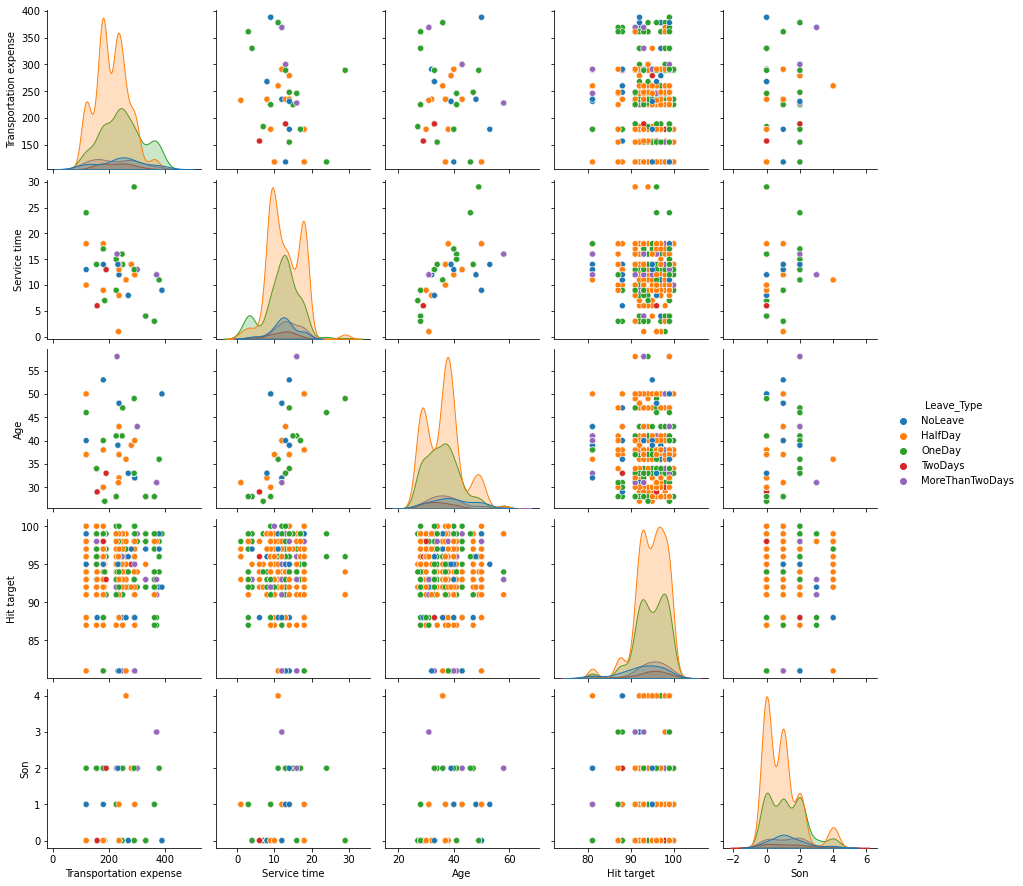

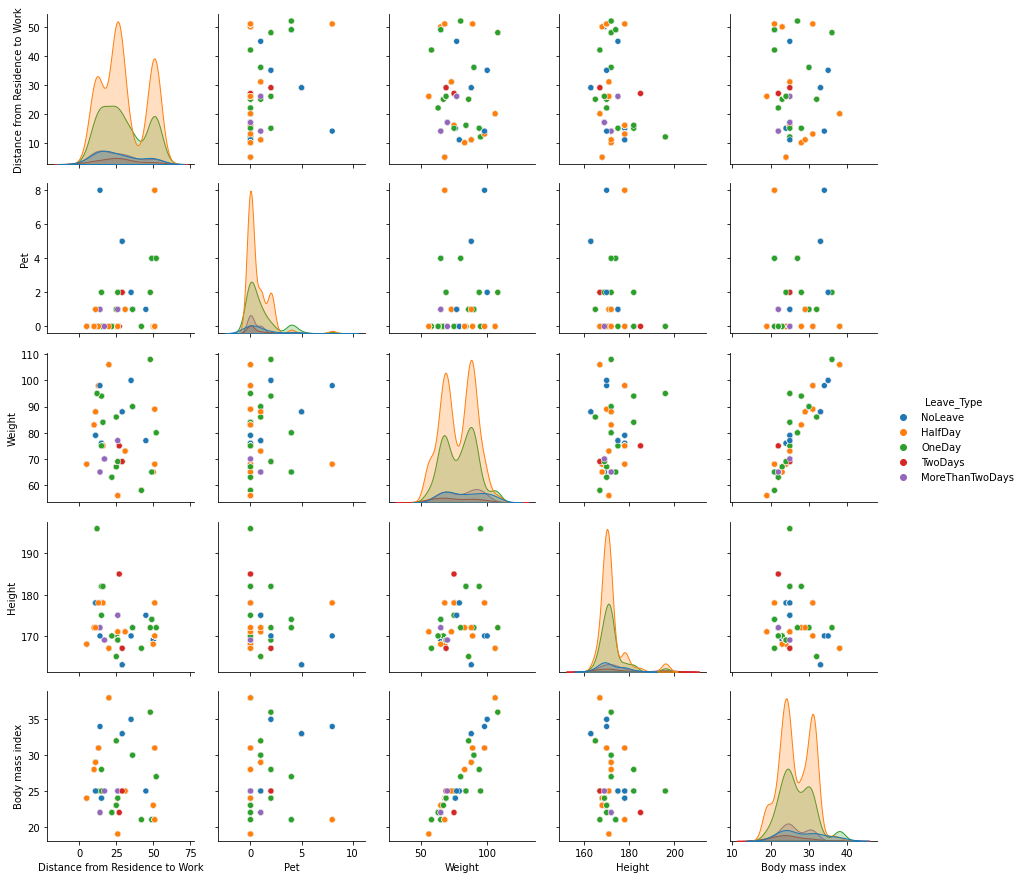

In [17]:
# Used sns pairplot, where non diagonal charts are scatter plot of each quantitative varibale with the target variable.
# Also, bifurcated into two subsets for better visibility

import seaborn as sns
import matplotlib.pyplot as plt

g1= sns.pairplot(data=df, hue='Leave_Type', vars=['Transportation expense', 'Service time','Age','Hit target','Son']);

g2= sns.pairplot(data=df, hue='Leave_Type', vars=['Distance from Residence to Work','Pet','Weight', 'Height','Body mass index']);

plt.show()


## 4.2 EDA using visuals


### 1. Correlation Heat Map

We are picking correlation 'Heat Map' to find out correlation between the set of independent (X) attributes.

### Justification -  

Higher correlation implies multicollinearity. In a classification problem, multicollinearity among attributes can create problems for the model. Multicollinearity occurs when two or more independent variables are highly correlated with each other, which can make it difficult for the model to estimate the unique contribution of each variable to the outcome of the target variable.

### Observation -  

Below plot clearly shows multicollinearity issue between 'Age' and 'Service Time' & 'Weight' & 'Body mass index'. These need to be elimiated before creation of the model.


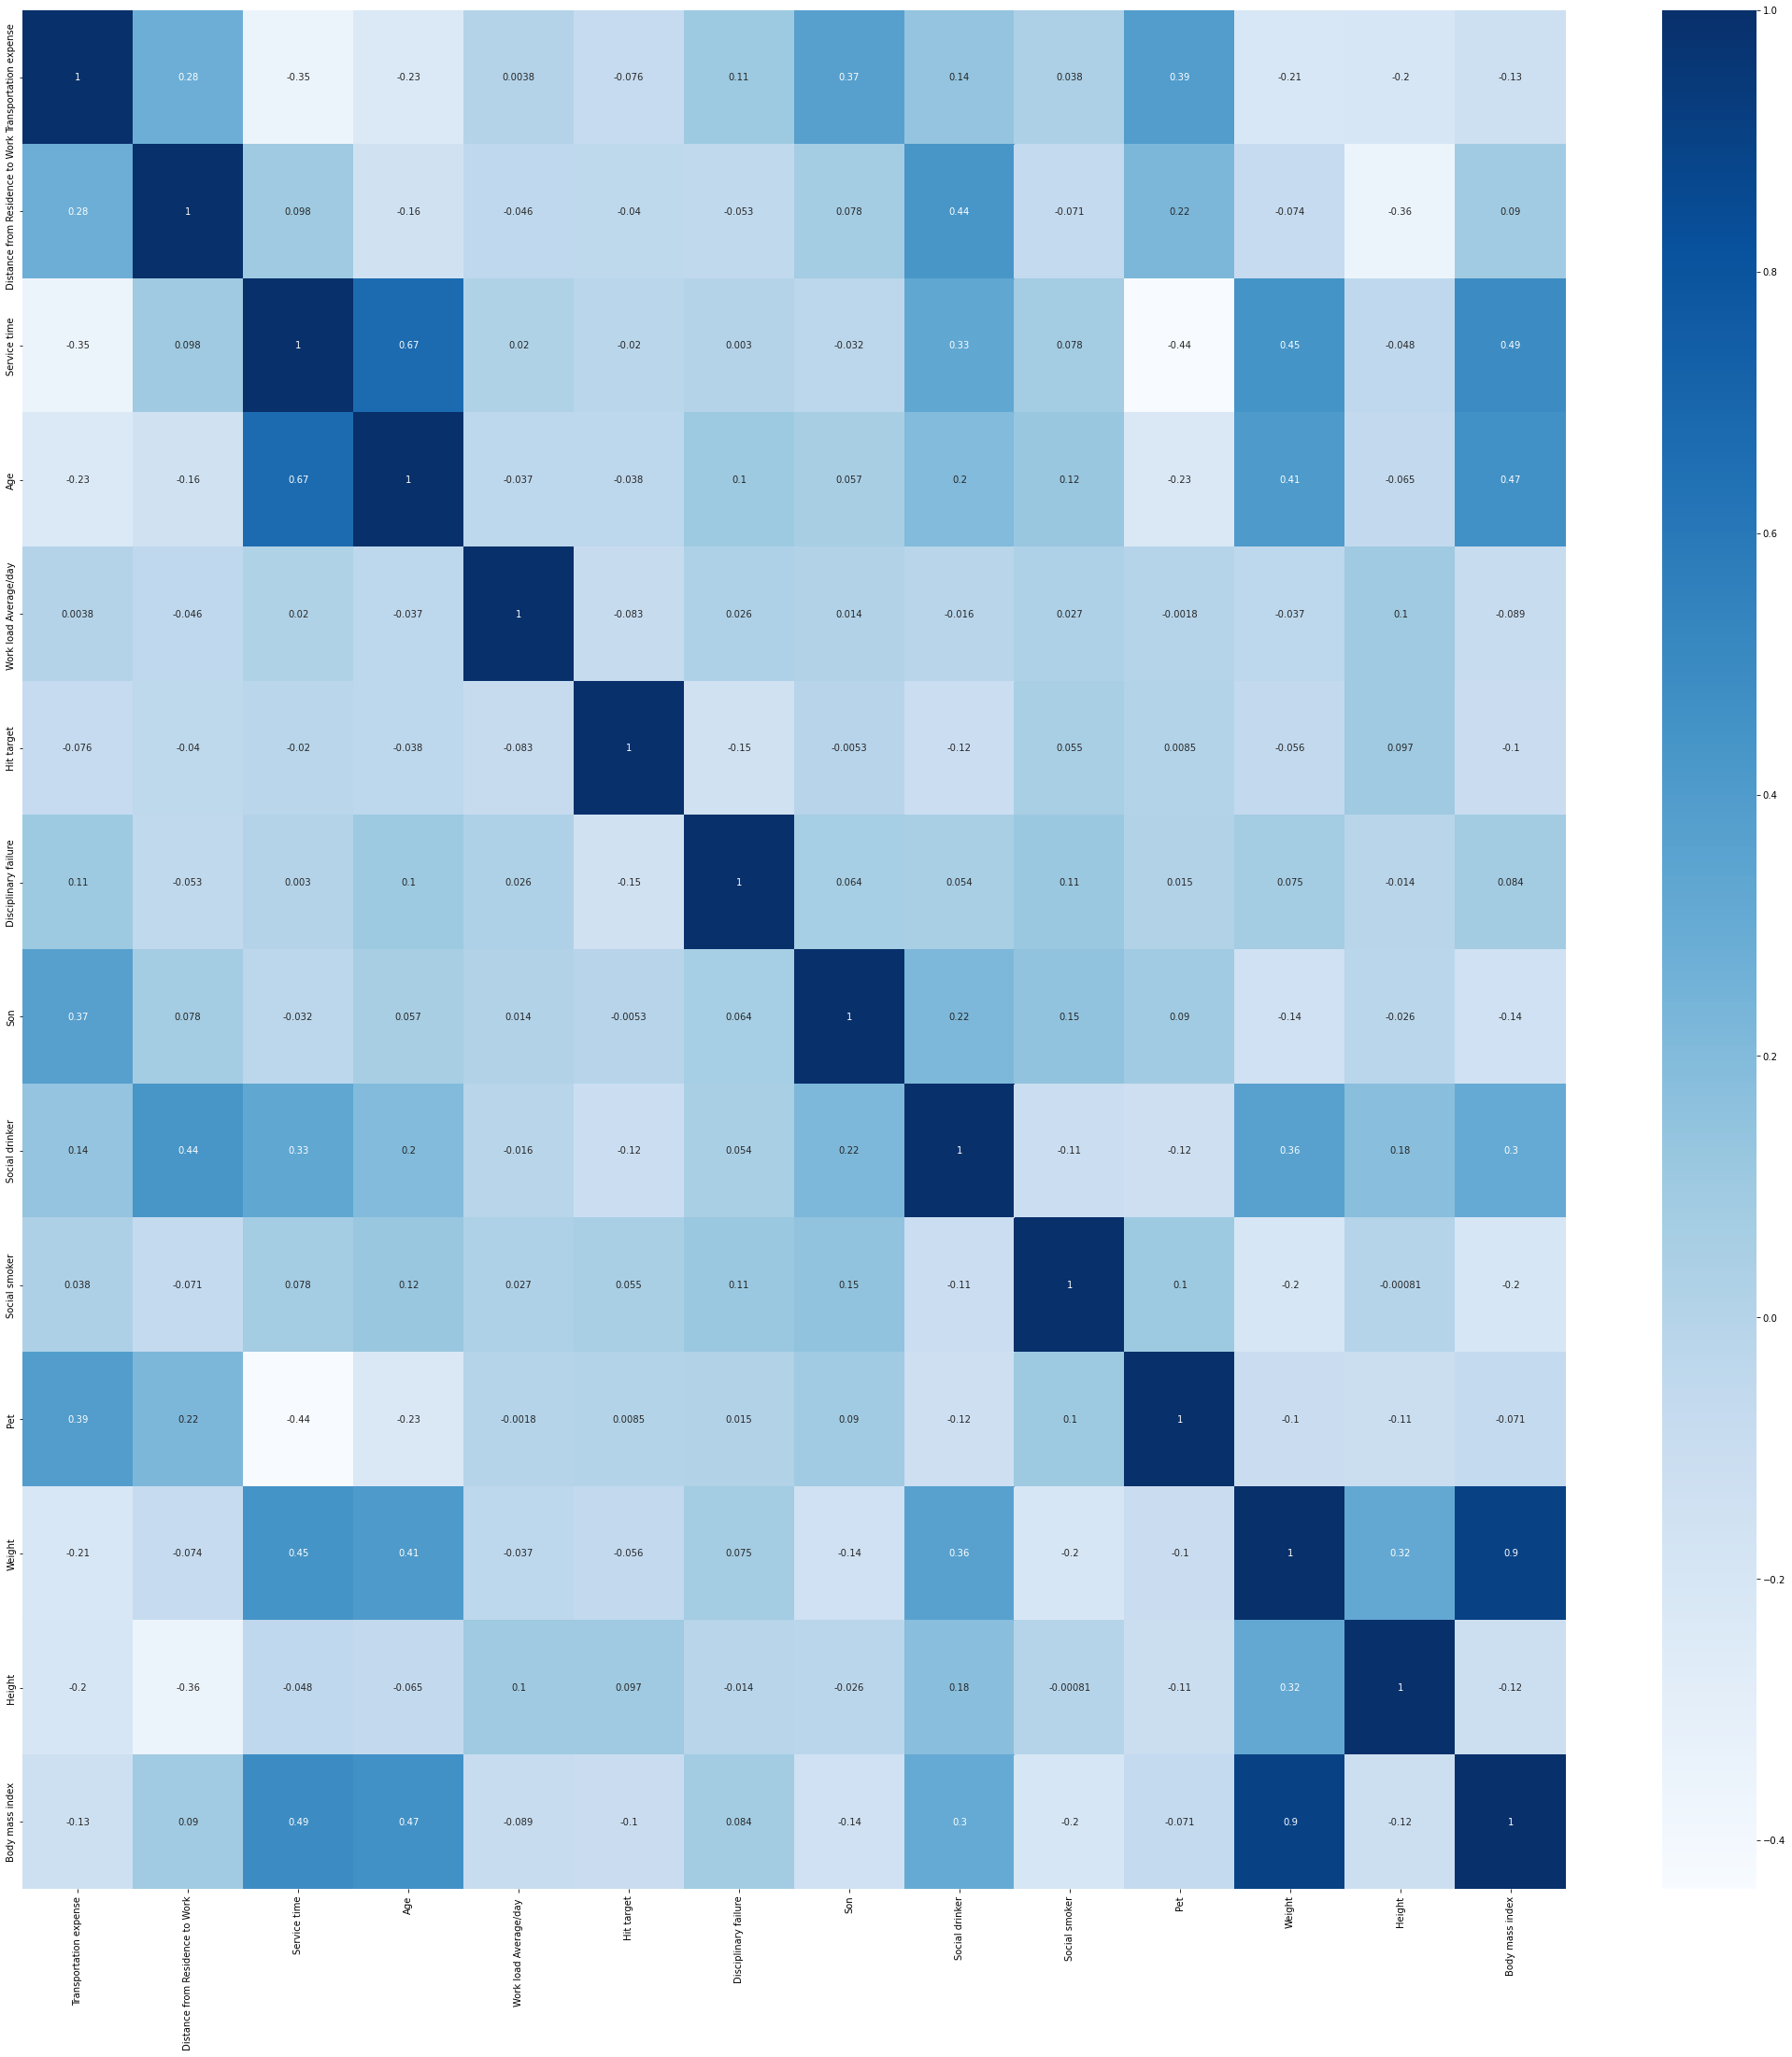

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(37, 37))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

### 2. Bar Plot - Categorical attributes vs Target variable

We are plotting Bar Plot (Count Plot) for each categorical attributes with target variable Leave_Type

### Justification -  

To check the relation of classes within Leave_Type against the independent categorical features, CoutnPlot is used. It gives the insights into data imbalance within each of these variables. Data imbalance can effect the model training and performance. Hence exploring this visual is taken into consideration. 


### Observations -  

1. Education - type 1 have significantly more instances of leaves than other types
2. Reason of absence - 23 have significantly high leaves
3. First three months have higher instances of leaves
4. Leaves are consistent each day of the week and in each seasons.


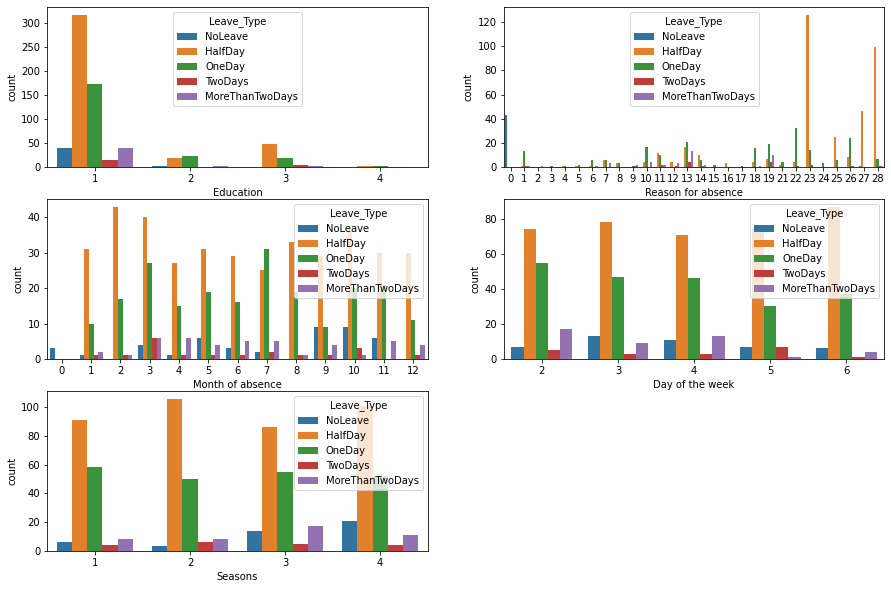

In [19]:
# Create subplots and plot each count plot

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x="Education", hue="Leave_Type",ax=ax[0,0])
sns.countplot(data=df, x="Reason for absence", hue="Leave_Type", ax=ax[0,1])
sns.countplot(data=df, x="Month of absence", hue="Leave_Type", ax=ax[1,0])
sns.countplot(data=df, x="Day of the week", hue="Leave_Type", ax=ax[1,1])
sns.countplot(data=df, x="Seasons", hue="Leave_Type", ax=ax[2,0])
ax[2,1].axis('off')
plt.show()


### 3. Bar Plot to check Average Load versus Leave Type classes

### Justification -
We want to check if counts are higher in specific leave class dependening on Average Work Load. This is to determine if any relation of higher work load on leaves.

### Observations -
There seems to be no significant impact of 'Avg. Work Load' on 'Leave_Type


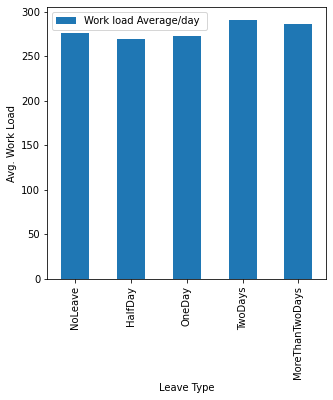

In [20]:
# Comparing avg. work load vs leave type
bins = [-np.inf,0,4, 8, 16, np.inf]
ageWorkSum = df.groupby('Leave_Type', as_index=False)[['Work load Average/day ']].mean()
ax = ageWorkSum.plot(kind='bar', x='Leave_Type', figsize=(5,5))
ax.set_ylabel('Avg. Work Load')
ax.set_xlabel('Leave Type');

### 4. Bar Plot - To check count of each leave class in Target variable Leave_Type

### Justification -
We are interested in check which leave type have more as compared to others.


### Observations -
HalfDay' is most frequent, followed by OneDay

HalfDay            384
OneDay             215
NoLeave             44
MoreThanTwoDays     44
TwoDays             19
Name: Leave_Type, dtype: int64


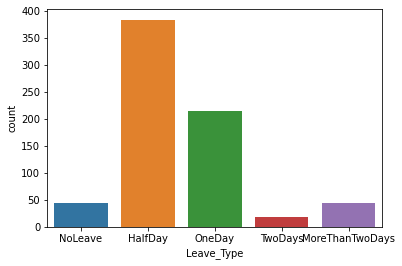

In [21]:
import warnings
warnings.filterwarnings('ignore')
print(df['Leave_Type'].value_counts())
sns.countplot(df['Leave_Type']);

# 5. Data Wrangling



## 5.1 Univariate Filters 


### 1. Mutual Information (Information Gain)


In [22]:
from sklearn.feature_selection import mutual_info_classif
X = df.drop(columns=['Leave_Type'],axis=1)
y = df['Leave_Type']
coeff_df = pd.DataFrame(mutual_info_classif(X, y).reshape(-1, 1), columns=['Coefficient'], index=X.columns)
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Reason for absence,0.520738
Disciplinary failure,0.191597
Distance from Residence to Work,0.120666
Weight,0.098514
Body mass index,0.096327
Service time,0.081969
Transportation expense,0.081198
Age,0.057228
Height,0.050078
Work load Average/day,0.037231


### 2. Chi-Squared test

We will conduct independence test of categorical features with target variable which is also categorical. As Chi-Squared test is recommended for categorical variables.  


In [23]:
from sklearn.feature_selection import chi2

cols_todrop = df.select_dtypes(include=['int64', 'float64','bool']).columns.tolist()
cols_todrop.append('Leave_Type')
X= df.drop(cols_todrop, axis=1)
y = df['Leave_Type']

chi2_scores, _ = chi2(X, y)
print(X.columns,'\n', chi2_scores)

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Education'],
      dtype='object') 
 [1234.69530326    6.21228173    8.86596546    7.13794911    2.5564151 ]


## 5.2 Report observations  


### Mutual Information (Information Gain)
    
    1. Features with high mutual information scores are considered more informative and have a higher predictive power.
    2. As per Coefficient information, following are the top 5 features- 
         1. Reason for absence
         2. Disciplinary failure
         3. Distance from Residence to Work
         4. Weight
         5. Transportation expense
      
 
 ### Chi-Squared test
 
     1. Features with high chi-squared scores are considered more informative and have a higher predictive power.  
     2. As per Chi2 scores, 'Reason for absence' should be picked as its Chi2 score is very high.
 
        

# 6. Implement Machine Learning Techniques


## 6.1 ML technique 1 + Justification

### 1. RandomForestClassifier

### Justification -  

We picked Ensemble method (RandomForest Classifer) as the dataset have more number of features and Ensemble method combines multiple decision tress to give a robust model with high accuracy.



In [24]:
# importing libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


 Accuracy: 0.7137809187279152

 Classification Report:
                  precision    recall  f1-score   support

        HalfDay       0.81      0.85      0.83       158
MoreThanTwoDays       0.20      0.12      0.15        16
        NoLeave       1.00      0.78      0.88        18
         OneDay       0.57      0.61      0.59        84
        TwoDays       0.00      0.00      0.00         7

       accuracy                           0.71       283
      macro avg       0.52      0.47      0.49       283
   weighted avg       0.70      0.71      0.70       283



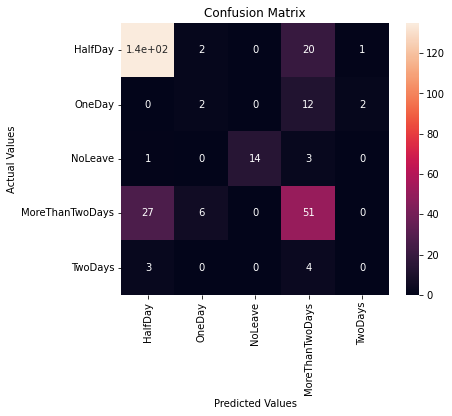

In [25]:
# Creating x by droping features of lesser importance

x = df.drop(columns=['Leave_Type','Social smoker','Social drinker','Day of the week'],axis=1)
y = df['Leave_Type']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.4, random_state=33)
model = RandomForestClassifier(n_estimators=200, random_state=0, oob_score=True, n_jobs=-1)
model.fit(xTrain,yTrain)
yPred = model.predict(xTest)

# Checking metrics for the model
print("\n Accuracy:", metrics.accuracy_score(yTest, yPred))

print("\n Classification Report:\n", classification_report(yTest, yPred))

#print("\n Confusion Matrix:\n", confusion_matrix(yTest, yPred))
cm = confusion_matrix(yTest, yPred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['HalfDay','OneDay','NoLeave','MoreThanTwoDays','TwoDays'], 
                     columns = ['HalfDay','OneDay','NoLeave','MoreThanTwoDays','TwoDays'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## 6.2 ML technique 2 + Justification

### 2. BaggingClassifier

### Justification -

Next we picked BaggingClassifier with base estimator DecisionTree. 

We were trying to see if we get a better model as a result of benefits associated with Bagging i.e 'Training the base classifier using 'independent random sampling with replacement' of the training dataset resulting into base classifiers that are different from each other, and their individual errors will be uncorrelated. Now, by averaging their predictions, the resulting ensemble model can often reduce variance and improve generalization performance'.



 OOB Score:  0.7044917257683215

 Accuracy: 0.7137809187279152

 Classification Report:
                  precision    recall  f1-score   support

        HalfDay       0.81      0.85      0.83       158
MoreThanTwoDays       0.20      0.12      0.15        16
        NoLeave       1.00      0.78      0.88        18
         OneDay       0.57      0.61      0.59        84
        TwoDays       0.00      0.00      0.00         7

       accuracy                           0.71       283
      macro avg       0.52      0.47      0.49       283
   weighted avg       0.70      0.71      0.70       283



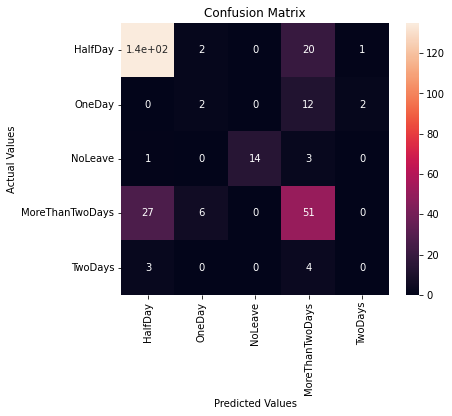

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=100,
          max_samples=0.8,
          oob_score=True)

bagging.fit(xTrain,yTrain)
print("\n OOB Score: ",bagging.oob_score_)

# Checking metrics for the model
print("\n Accuracy:", metrics.accuracy_score(yTest, yPred))

print("\n Classification Report:\n", classification_report(yTest, yPred))

cm = confusion_matrix(yTest, yPred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['HalfDay','OneDay','NoLeave','MoreThanTwoDays','TwoDays'], 
                     columns = ['HalfDay','OneDay','NoLeave','MoreThanTwoDays','TwoDays'])
#Plotting the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## 7. Conclusion 


### Performance Comparision of ML techniques used

1. Accuracy - Proportion of correct predictions over the total number of predictions made by the model
    
    RandomForestClassifier - 0.71
    BaggingClassifier - 0.71
    
   The accuracy of prediction remained same for two ML techniques. 71% is a good score, however it can be improved further by      exploring other methods and techniques.
   
   
2. Precision - Proportion of true positives among the total predicted positives

    Both models have similar numbers. 
    However, classes 'HalfDay', 'OneDay','NoLeave' have high precision while classes 'TwoDays' 'MoreThanTwoDays' have very low       precision
    
    
3. Recall - Proportion of true positives among the total actual positives.

    Both models have similar numbers. 
    However, classes 'HalfDay', 'OneDay','NoLeave' have high recall while classes 'TwoDays' 'MoreThanTwoDays' have very low         recall
    
    
4. f1-score - Harmonic mean of precision and recall, which combines both measures to provide a more balanced view of a model                   performance.

    Both models have similar numbers. 
    However in similar lines to Precision and Recall, classes 'HalfDay', 'OneDay','NoLeave' have high f1-score while classes         'TwoDays' 'MoreThanTwoDays' have very low f1-score.
    
    
5. Confusion Matrix - Both models have same confusion matrix. Diagonal entries have high numbers which represents true positives    and true negatives. While there are false positive and false negative counts as well in on-diagonal entries.\


### Summary Comments -

Above measures tells that are some classes are predicted well while some are not, likely due to lack of adequate samples in the dataset. Also, both model techniques gave similar performance.
    
    


## 8. Solution

### Proposed Solution

The two ML models attempted gave a fairly good predictive mechanism to find ways to optimize features that leads to higher absenteeism. Using them, online retailer company can work on those features and improve delivery performance and better outcomes for delivery boys. Taking it further, even better model performance can be attempted using techniques like Neural Networks. But the given solution is good enough to adopt and gain improvements.

### Learnings / Observations / Challenges

1. Higher count of samples(rows) in the dataset could have resulted into better 'training' and 'testing'. Also, 'validation' could have been done before 'testing', if dataset had more samples. 

2. Even though 'Absenteeism hours' data was continous in nature, encoding it into categorical using binning helped in putting a good view for classification.

3. Feature enginering using Information Gain and Chi-Square helped in determining feature importance correctly.

4. While we expected model perfomance to become better between the two ML techniques, it remained same.

5. We felt the need to explore more ways to gain higher model performance using other techniques, methods that are available.


This concludes this machine learning excerise!


